# Regresión logística con SK-Learn.

Hasta ahora hemos implementado nuestras propias funciones para hacer clasificación binaria usando Regresión Logística. Vamos a ver en este Notebook cómo usar `scikit-learn` para implementar **Regresión Logística**.

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

En `Scikit-Learn` encontramos diferentes clases y funciones útiles para crear modelos de clasificación binaria. Una de las más importantes es la función `make_classification`, que pertenece al módulo `datasets`. Esta función es ideal para generar datos sintéticos de manera controlada, lo cual facilita la experimentación y la evaluación de modelos de clasificación.

A continuación, usaremos `make_classification` para generar un conjunto de datos de 100 muestras, con dos variables predictoras divididas en dos clases. 

Parámetros más importantes de [`make_classification()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification):
* `n_samples`: Número total de muestras (observaciones) generadas en el conjunto de datos. Es el tamaño del dataset.
* `n_features`: Número de características o variables de entrada. Representan las dimensiones que se utilizarán para la clasificación.
* `n_informative`: Número de características que son realmente relevantes o informativas para la clasificación. Las demás características, si las hubiera, serían redundantes o ruido.
* `n_classes`: Número de clases o etiquetas en el conjunto de datos. Por defecto, el valor es 2 (para clasificación binaria), pero se puede ajustar para generar problemas multiclase.
* `weights`: Vector que determina el porcentaje de muestras en cada clase. Por defecto estarán balanceadas.
* `class_sep`: Controla la separación entre las clases. Un valor más alto genera clases que están más separadas, lo que facilita la clasificación. Si el valor es bajo, las clases estarán más mezcladas, lo que puede aumentar la dificultad del problema.

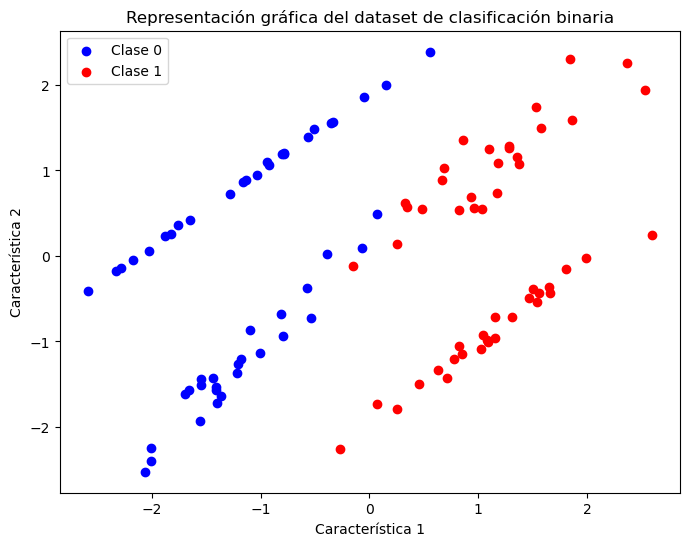

In [2]:
# Generar el dataset de clasificación binaria
X, y = make_classification(n_samples=100,   # número de muestras
                           n_features=2,    # número de características
                           n_informative=2, # características informativas
                           n_redundant=0,   # características redundantes
                           n_clusters_per_class=2, # agrupamiento de clases
                           random_state=42) # reproducibilidad

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Dibujar los puntos de cada clase con colores diferentes
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')

# Añadir etiquetas y título
plt.title('Representación gráfica del dataset de clasificación binaria')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

# Mostrar la gráfica
plt.show()

#### División en *Train-Test* y Estandarización:

Utilizamos `StandardScaler` para estandarizar las características del dataset. Esto es importante para que el modelo se entrene de manera óptima, ya que la regresión logística puede verse afectada por la escala de los datos.

In [3]:
# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos para que todas las features estén en la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

La clase `LogisticRegression` de `scikit-learn` se utiliza para implementar el algoritmo de regresión logística,tanto  problemas de clasificación binaria y también de clasificación multiclase. El modelo predice la probabilidad de que una muestra pertenezca a una clase utilizando la función sigmoide, y clasifica la muestra en función de esta probabilidad.

Parámetros más importantes de [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression):

* `penalty`: Define la regularización del modelo.
   * `penalty= l2`: Regularización de norma L2 (Ridge), que es la opción por defecto.
   * `penalty= l1`: Regularización de norma L1 (Lasso).
   * `penalty= elasticnet`: Combinación de L1 y L2.
* `C`:Es el inverso de la fuerza de regularización. Un valor pequeño de C implica una regularización fuerte, mientras que un valor grande indica menos regularización.
* `solver`:Especifica el algoritmo utilizado para optimizar la función de coste. Diferentes solvers son más adecuados según el tipo de problema (tamaño de los datos, tipo de regularización).
   * `solver=lbfgs`: El más utilizado, eficiente para problemas de tamaño pequeño o mediano. L-BFGS es un método cuasi-Newtoniano, lo que significa que aproxima la matriz hessiana en cada iteración. Funciona bien con la regularización L2 y multiclase.
   * `solver=liblinear`: Bueno para problemas pequeños y con regularización L1 o L2.
   * `solver=sag` y `solver=saga`: Son solvers más eficientes en conjuntos de datos grandes.
   
* `max_iter`: Número máximo de iteraciones que el solver ejecutará para encontrar la solución óptima. Si el modelo no converge antes de alcanzar este número, es posible aumentarlo.
* `multi_class`: Determina cómo manejar problemas de clasificación multiclase: (A partir de la versión 1.7 de `sklearn` no hará falta especificar este parámetro ya que solo se empleará *multinomial* usando la función `softmax`)
   * `multi_class=ovr`: "Uno contra el resto" (one-vs-rest), que entrena un clasificador binario para cada clase.
   * `multi_class=multinomial`: Para problemas multiclase con el solver 'lbfgs' o 'saga'.
* `tol`: Define la tolerancia para la convergencia. Si el cambio en la función de coste es menor que `tol`, se considera que el modelo ha convergido.

In [ ]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre el conjunto de test
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

En `LogisticRegression` de `scikit-learn`, las funciones `.predict_proba()` y `.predict()` se utilizan para hacer predicciones, pero la diferencia radica en el tipo de salida que generan:

* `predict_proba()`: Devuelve las probabilidades estimadas para cada clase. La salida es un array con las probabilidades para cada muestra y cada clase. Para un problema binario, te devolverá dos columnas: una con la probabilidad de la clase 0 y otra con la probabilidad de la clase 1.

* `predict()`: Devuelve la clase predicha para cada muestra. La salida es un array con las clases (0 o 1 en un problema binario) a las que el modelo ha asignado cada muestra. La predicción se realiza tomando la clase que tiene la probabilidad más alta. Internamente, `.predict()` usa `.predict_proba()` para obtener las probabilidades, y luego asigna la clase según el umbral de probabilidad (por defecto, 0.5 en clasificación binaria).



### Regresión Logística Múltiple usando `Scikit-Learn`

La regresión logística múltiple (o multinomial) se puede implementar en `scikit-learn` utilizando la clase `LogisticRegression`. Dependiendo del problema, puedes optar por la estrategia One-vs-All (también llamada One-vs-Rest) o Softmax (también conocida como Regresión Multinomial).

#### Generación del *Dataset*
Primero, generaremos un dataset multiclase con `make_classification`

In [ ]:
#  Generar dataset multiclase con make_classification
X, y = make_classification(n_samples=1000,   # número de muestras
                           n_features=4,    # número de características
                           n_informative=3, # características informativas
                           n_redundant=0,   # características redundantes
                           n_classes=3,     # número de clases
                           random_state=42) # reproducibilidad

#### División en *Train-Test* y Estandarización:

Utilizamos `StandardScaler` para estandarizar las características del dataset. Esto es importante para que el modelo se entrene de manera óptima, ya que la regresión logística puede verse afectada por la escala de los datos.

In [ ]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos para que todas las features estén en la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Clasificación y métricas.

Como ya vimos la clase `LogisticRegression` de `scikit-learn` se utiliza para implementar el algoritmo de regresión logística, tanto problemas de clasificación binaria y también de clasificación multiclase. 


In [ ]:
# Implementación de Regresión Logística Múltiple con Softmax

##   Softmax (multinomial)
print("\n==== Softmax (Multinomial) ====")
logreg_softmax = LogisticRegression(solver='lbfgs', max_iter=200)
logreg_softmax.fit(X_train, y_train)

# Predicciones y métricas
y_pred_softmax = logreg_softmax.predict(X_test)
print("Accuracy (Softmax):", accuracy_score(y_test, y_pred_softmax))
print("Classification Report (Softmax):\n", classification_report(y_test, y_pred_softmax))
print("Confusion Matrix (Softmax):\n", confusion_matrix(y_test, y_pred_softmax))

# Visualización de la matriz de confusión 

fig, axs = plt.subplots(1,1 , figsize=(8, 4))

# Matriz de confusión para Softmax
sns.heatmap(confusion_matrix(y_test, y_pred_softmax), annot=True, fmt='d', cmap='Greens')
axs.set_title("Matriz de Confusión (Softmax)")
axs.set_xlabel("Predicción")
axs.set_ylabel("Valor Real")

plt.show()

### Regularización en Regresión Logística Múltiple. 

In [ ]:
# 1. Generar dataset multiclase
X, y = make_classification(n_samples=500,    # Menos datos para aumentar overfitting
                           n_features=200,   # Muchísimas características
                           n_informative=5,  # Solo 5 útiles
                           n_redundant=50,   # Más redundantes para aumentar correlaciones
                           n_repeated=20,    # Características repetidas
                           n_classes=3,
                           flip_y=0.2,       # Más ruido en las etiquetas
                           random_state=742)

# 2. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=742)

# 3. Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Implementación de la regresión logística múltiple conregularización

# Sin regularización (penalty='none')
print("==== Sin Regularización ====")
logreg_no_reg = LogisticRegression( solver='lbfgs', penalty=None, max_iter=1000)
logreg_no_reg.fit(X_train, y_train)

# Predicciones
y_pred_no_reg = logreg_no_reg.predict(X_test)

# Métricas
print("Accuracy (sin regularización):", accuracy_score(y_test, y_pred_no_reg))
print("Classification Report (sin regularización):\n", classification_report(y_test, y_pred_no_reg))

# Con regularización L2 (Ridge)
print("\n==== Con Regularización L2 (Ridge) ====")
logreg_l2 = LogisticRegression(solver='liblinear', penalty='l2', C=0.01, max_iter=1000)
logreg_l2.fit(X_train, y_train)

# Predicciones
y_pred_l2 = logreg_l2.predict(X_test)

# Métricas
print("Accuracy (L2 regularization):", accuracy_score(y_test, y_pred_l2))
print("Classification Report (L2 regularization):\n", classification_report(y_test, y_pred_l2))

# Con regularización L1 (Lasso)
print("\n==== Con Regularización L1 (Lasso) ====")
logreg_l1 = LogisticRegression( solver='saga', penalty='l1', C=0.1, max_iter=1000)
logreg_l1.fit(X_train, y_train)

# Predicciones
y_pred_l1 = logreg_l1.predict(X_test)

# Métricas
print("Accuracy (L1 regularization):", accuracy_score(y_test, y_pred_l1))
print("Classification Report (L1 regularization):\n", classification_report(y_test, y_pred_l1))

### Uso de `GridSearch` para seleccionar los parámetros óptimos.

`GridSearchCV` es una herramienta de Scikit-Learn que permite encontrar la mejor combinación de hiperparámetros para un modelo. En este caso, lo usaremos para optimizar la regresión logística probando distintas opciones de:

* Solver → Diferentes algoritmos de optimización.
* Penalty → Tipo de regularización (L1 o L2)
* C → Nivel de regularización (inverso de la fuerza de regularización)
* max_iter → Número de iteraciones para la convergencia

El parámetro `cv = 5` implica que vamos a hacer validación cruzada (*cross validation*) sobre el conjunto de entrenamiento dividiendo X_train en 5 subconjuntos o *folds*. 
El modelo se entrena en 4 partes y se valida en la restante. Esto se repite 5 veces, cambiando el *fold* de validación en cada iteración. Se obtiene la media de las métricas: accuracy, F1-score, etc. (en nuestro caso `scoring='accuracy'`) para evaluar cada combinación de hiperparámetros.

In [ ]:
# Definir los hiperparámetros a probar
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1],  # Valores pequeños = más regularización
    'max_iter': [1000, 2000]  # Asegurar convergencia
}

# Inicializar modelo base
logreg = LogisticRegression()

# Configurar GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose = 1)

# Ejecutar búsqueda de mejor combinación
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejor combinación encontrada:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Mostrar accuracy final
print("\n Accuracy con los mejores parámetros:", accuracy_score(y_test, y_pred_best))
print("\n Classification Report:\n", classification_report(y_test, y_pred_best))